In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parte I

In [3]:
archiveAll = 'dataAll.txt'
dataAll = np.fromfile(archiveAll)
lenAll = int(len(dataAll)/3)
dataAll = np.reshape(dataAll, (lenAll,3)) 
# Eu sei que é (m,1,3), mas na prática não vimos muita diferença então colocamos (m,3)

dataAll

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [4]:
w = np.random.uniform(low=-0.5,high=0.5,size=2)
x = dataAll
err = np.repeat(1, len(x)) #
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err)):
    epoca += 1
    print("Época",epoca)
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            w = w + n*(yd-y)*xd
            print(w)
        else:
            err[i] = 0

Pesos iniciais: [-0.05989526  0.07071526]
Época 1
[ 36.31894474 -24.34351474]
[ -17.34010526 -100.83926474]
[ 55.45591474 -65.00970474]
[138.05461474  14.84612526]
[143.90037474 -63.44846474]
[ 103.89146474 -141.34115474]
[157.56127474 -92.24888474]
[ 104.60121474 -149.11834474]
[164.16073474 -98.99601474]
[ 118.63610474 -164.63194474]
[209.35196474 -89.91862474]
[ 151.57097474 -150.22677474]
[ 103.30441474 -198.69649474]
[ 173.75176474 -156.58022474]
[ 126.90976474 -207.99009474]
[ 196.77339474 -143.77115474]
[ 140.93766474 -199.94868474]
[ 217.92513474 -135.09935474]
[ 181.65509474 -178.32739474]
[ 163.41595474 -196.66103474]
[ 238.83839474 -130.60592474]
[ 174.47926474 -213.02836474]
[ 265.78747474 -129.75759474]
[ 218.74264474 -217.66153474]
Época 2
[ 170.47608474 -266.13125474]
[ 240.33971474 -201.91231474]
[ 184.50398474 -258.08984474]
[ 261.49145474 -193.24051474]
[ 225.22141474 -236.46855474]
[ 308.11328474 -153.68706474]
[ 261.96590474 -210.33644474]
[ 235.34028474 -242.858814

In [5]:
print("Foram feitos",aj,"ajustes")
print("E se levaram",epoca,"épocas")

# O número total de ajustes no vetor de pesos;
# (b) O número de épocas até a convergência;
# (c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
# obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
# cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.
# x2 = 1.000369759x1

Foram feitos 55 ajustes
E se levaram 4 épocas


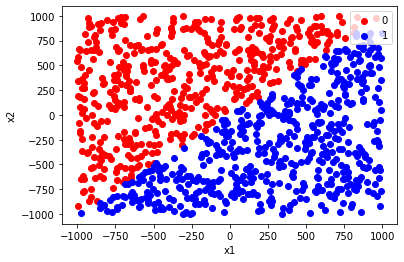

In [6]:
import pandas as pd

df = pd.DataFrame(dataAll, columns=['x1', 'x2', 'yd'])
     
x0 = np.array(df[df['yd'] == 0]) 
x1 = np.array(df[df['yd'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        plt.scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "1")

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

# Parte II

In [7]:
# Hiago - 1515280014
# Alex - 1515080008

archive = 'data' + str((4+8) % 4) + '.txt'
data0 = np.fromfile(archive)
len0 = int(len(data0)/3)
data0 = np.reshape(data0, (len0,3))

nl = [0.4,0.1,0.01]
Il = [100, 1, 0.5]
for N in nl:
    for I in Il:
        w = np.random.uniform(low=-I,high=I,size=2)
        x = data0
        err = np.repeat(1, len(x))
        n = N
        aj = 0
        print("Pesos iniciais:",w)
        epoca = 0
        l = []
        while (np.isin(1, err) and epoca < 100):
            epoca += 1
            for i in range(len(x)):
                yd = x[i][2]
                xd = np.array([x[i][0],x[i][1]])
                sigma = w[0]*xd[0]+w[1]*xd[1]
                if (sigma >= 0): # função degrau
                    y = 1
                else:
                    y = 0
                if (y != yd):
                    err[i] = 1
                    aj += 1
                    
                    w = w + n*(yd-y)*xd
                    #print(w)
                else:
                    err[i] = 0
        print("Taxa de aprendizado:",n)
        print("Intervalo:",-I,I)
        print("Pesos finais:",w)
        print("Épocas passadas:",epoca)
        print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))
        print()

Pesos iniciais: [-22.84678022   6.48519467]
Taxa de aprendizado: 0.4
Intervalo: -100 100
Pesos finais: [0.33009867 0.47543725]
Épocas passadas: 100
Quantidade de certos: 529 / 600

Pesos iniciais: [0.05861258 0.87832521]
Taxa de aprendizado: 0.4
Intervalo: -1 1
Pesos finais: [0.31588027 0.49568514]
Épocas passadas: 100
Quantidade de certos: 527 / 600

Pesos iniciais: [-0.49067102  0.49588535]
Taxa de aprendizado: 0.4
Intervalo: -0.5 0.5
Pesos finais: [0.40713697 0.44198462]
Épocas passadas: 100
Quantidade de certos: 523 / 600

Pesos iniciais: [-69.28607698  63.28260429]
Taxa de aprendizado: 0.1
Intervalo: -100 100
Pesos finais: [-9.89187448 23.23092046]
Épocas passadas: 100
Quantidade de certos: 523 / 600

Pesos iniciais: [ 0.87027647 -0.32873675]
Taxa de aprendizado: 0.1
Intervalo: -1 1
Pesos finais: [0.10438167 0.10829525]
Épocas passadas: 100
Quantidade de certos: 522 / 600

Pesos iniciais: [0.42229168 0.22047237]
Taxa de aprendizado: 0.1
Intervalo: -0.5 0.5
Pesos finais: [0.1042834

# Parte III

In [8]:
archive = 'dataHoldout.txt'
dataH = np.fromfile(archive)
dataH = np.reshape(dataH, (int(len(dataH)/3),3))
dataH

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

In [9]:
# Fazendo o split 70%-30%

np.random.shuffle(dataH)

# Define a size for your train set 
train_size = int(0.7 * len(dataH))

# Split your dataset 
train_set = dataH[:train_size]
test_set = dataH[train_size:]

In [10]:
w = np.random.uniform(low=-1.0,high=1.0,size=2)
x = train_set
err = np.repeat(1, len(x))
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err) and epoca < 100):
    epoca += 1
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            
            w = w + n*(yd-y)*xd
            #print(w)
        else:
            err[i] = 0
    np.random.shuffle(train_set)
    # Randomizando o treinamento ao fim de cada época
print("Pesos finais:",w)
print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))

Pesos iniciais: [-0.30709647 -0.18530795]
Pesos finais: [-0.13301464 -0.03114872]
Quantidade de certos: 466 / 560


In [11]:
x = train_set
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1
confusion_matrix = np.array([[tp,fp],[fn, tn]])
print("Quantidade de certos:",right,"/",len(x))
tpTrain = tp
fpTrain = fp
fnTrain = fn
tnTrain = tn
rightTrain = right
confusion_matrix

Quantidade de certos: 462 / 560


array([[ 64,  24],
       [ 74, 398]])

In [12]:
x = test_set
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1

confusion_matrix = np.array([[tp,fp],[fn, tn]])
tpTest = tp
fpTest = fp
fnTest = fn
tnTest = tn
print("Quantidade de certos:",right,"/",len(x))
confusion_matrix

Quantidade de certos: 203 / 240


array([[ 27,   2],
       [ 35, 176]])

## Métricas de desempenho

In [13]:
# Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
acTrain = rightTrain/train_size
print("Acurácia do treino:",acTrain)
# Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F -Score;
precTrain = tpTrain/(tpTrain+fpTrain)
revoTrain = tpTrain/(tpTrain+fnTrain)
FScoreTrain = (2*(precTrain*revoTrain))/(precTrain+revoTrain)
print("Precisão do treino:",precTrain)
print("Revocação do treino:",revoTrain)
print("F-Score do treino:",FScoreTrain)

Acurácia do treino: 0.825
Precisão do treino: 0.7272727272727273
Revocação do treino: 0.463768115942029
F-Score do treino: 0.5663716814159292


## A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

Apesar de uma acurácia e precisão boas, esta solução, no entanto, não é muito desejada. Quanto aos negativos, dos verdadeiramente negativos, não errou nenhum. Mas a solução tem precisão de 100% e revocação de 44%, isto indica que quando a solução diz que é positivo, é realmente positivo, mas ele tem muita dificuldade em identificar os verdadeiramente positivos, apesar de reconhecê-los quando os vê.

O F-Score da solução não ajuda muito, tendo 0.615 de pontuação, o que não é muito desejável. Com as métricas em mãos, nossa equipe tomou a conclusão de que esta solução não é de boa qualidade perante o conjunto de testes.